# data-SN1.csv

```
SELECT tag.name as "tag", period.name, internship.type, skill_entry_with_workflow.id, skill_main.code, skill_descriptor.code, skill_situation_family.code ,skill_entry_with_workflow.workflow_state, skill_entry_with_workflow.created_at, skill_entry_with_workflow.updated_at
FROM skill_entry_with_workflow
LEFT JOIN skill_descriptor ON skill_entry_with_workflow.skill_descriptor_id = skill_descriptor.id
LEFT JOIN skill_main ON skill_descriptor.skill_main_id = skill_main.id
LEFT JOIN skill_container_with_situation_family ON skill_entry_with_workflow.skill_container_id = skill_container_with_situation_family.id
LEFT JOIN skill_situation_family ON skill_container_with_situation_family.situation_family_id = skill_situation_family.id
LEFT JOIN scoreboard_entry_abstract ON skill_container_with_situation_family.id = scoreboard_entry_abstract.skill_container_id
LEFT JOIN internship_assignment ON scoreboard_entry_abstract.internship_assignment_id = internship_assignment.id
LEFT JOIN period ON internship_assignment.period_id = period.id
LEFT JOIN internship ON internship_assignment.internship_id = internship.id
LEFT JOIN internship_tag_for_internship ON internship.id = internship_tag_for_internship.internship_id
LEFT JOIN tag ON tag.id = internship_tag_for_internship.tag_for_internship_id

WHERE (period.name = "20222" OR period.name = "20231" OR period.name = "20232" OR period.name = "20241") AND internship.type = "internshipPractical" AND tag.name = "SN1"
```

In [1]:
import pandas as pd
import numpy as np
from fanalysis.ca import CA
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/data-SN1.csv')
display(data)

,tag,name,type,id,code,code.1,code.2,workflow_state,created_at,updated_at
0,SN1,20232,internshipPractical,0190f492-94e0-7bfe-9601-b397d20f3994,C4,C4NiD1,FS07,certified,2024-07-27 16:22:45,2024-08-19 14:35:08
1,SN1,20232,internshipPractical,0190ea73-ad38-7cdb-85aa-b9c0eaebaefe,C5,C5NnD5,FS05,certified,2024-07-25 17:12:47,2024-08-19 14:35:21
2,SN1,20232,internshipPractical,0190eacb-bb9d-7217-b334-6409dbdcd9f6,C2,C2NnD2,FS04,certified,2024-07-25 18:48:58,2024-08-19 14:36:16
3,SN1,20232,internshipPractical,0190f493-1695-7f94-9391-0bebec751643,C2,C2NnD2,FS07,certified,2024-07-27 16:23:18,2024-08-19 14:36:37
4,SN1,20232,internshipPractical,0190ea63-7c39-7253-8b53-fbb67144d30c,C1,C1NnD1,FS01,certified,2024-07-25 16:55:06,2024-08-19 14:41:46
...,...,...,...,...,...,...,...,...,...,...
41460,SN1,20231,internshipPractical,018c78c2-6867-72f4-88a4-33cee2ac2cd7,C4,C4NnD1,FS02,certified,2023-12-17 18:10:55,2024-01-29 19:39:55
41461,SN1,20231,internshipPractical,018c78c4-a2f9-7d40-9152-45c50b78b4bc,C1,C1NnD7,FS04,certified,2023-12-17 18:13:21,2024-01-29 19:39:23
41462,SN1,20231,internshipPractical,018c78c4-ea33-767a-9b4c-e519acbd4da8,C1,C1NnD8,FS04,certified,2023-12-17 18:13:40,2024-01-29 19:39:31
41463,SN1,20231,internshipPractical,018c78cb-7d5d-7454-81ab-a0aabf2887b1,C1,C1NnD7,FS02,certified,2023-12-17 18:20:51,2024-01-29 19:39:04


In [3]:
# data_pt = pd.pivot_table(data, values="name", index=[data['id']], columns=data['record'], aggfunc="count", fill_value=0, dropna=False)


data_pt = pd.pivot_table(data, values="id", index=[data['code']], columns=data['code.2'], aggfunc="count")
display(data_pt)

code.2,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
code,,,,,,,,,,,
C1,2435,2681,1755,1525,496,395,687,261,910,611,301
C2,1088,1174,835,504,222,193,343,142,442,286,134
C3,1547,1325,583,1033,468,66,144,200,340,252,183
C4,983,1945,1825,826,261,71,158,89,311,216,111
C5,2078,1883,1305,790,350,129,344,203,453,354,145
C6,600,718,480,431,171,53,136,145,157,135,48


In [4]:
col_names = list(data_pt.columns)[0:]
row_names = list(data_pt.index)

In [5]:
X = data_pt[col_names].values 

In [6]:
row_sum = np.sum(X, axis=1)
row_profile = X / row_sum[:, np.newaxis]

print("Profil ligne:")
display(pd.DataFrame(row_profile, index=row_names, columns=col_names))

Profil ligne:


,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
C1,0.201957,0.222360,0.145559,0.126483,0.041138,0.032761,0.056979,0.021647,0.075475,0.050676,0.024965
C2,0.202872,0.218907,0.155696,0.093977,0.041395,0.035987,0.063957,0.026478,0.082417,0.053328,0.024986
C3,0.251913,0.215763,0.094936,0.168214,0.076209,0.010747,0.023449,0.032568,0.055366,0.041036,0.029800
C4,0.144644,0.286198,0.268540,0.121542,0.038405,0.010447,0.023249,0.013096,0.045762,0.031783,0.016333
C5,0.258651,0.234379,0.162435,0.098332,0.043565,0.016057,0.042818,0.025268,0.056385,0.044063,0.018048
C6,0.195185,0.233572,0.156148,0.140208,0.055628,0.017241,0.044242,0.047170,0.051074,0.043917,0.015615


In [7]:
col_sum = np.sum(X, axis=0)
col_profile = X / col_sum[np.newaxis, :]

print("Profil colonne:")
display(pd.DataFrame(col_profile, index=row_names, columns=col_names))

Profil colonne:


,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
C1,0.278891,0.275653,0.258735,0.298493,0.252033,0.435502,0.379139,0.250962,0.348259,0.329558,0.326464
C2,0.124613,0.120707,0.123102,0.098649,0.112805,0.212789,0.189294,0.136538,0.169154,0.154261,0.145336
C3,0.177185,0.136233,0.085950,0.202192,0.237805,0.072767,0.079470,0.192308,0.130119,0.135922,0.198482
C4,0.112587,0.199979,0.269055,0.161675,0.132622,0.078280,0.087196,0.085577,0.119020,0.116505,0.120390
C5,0.238003,0.193605,0.192393,0.154629,0.177846,0.142227,0.189845,0.195192,0.173364,0.190939,0.157267
C6,0.068721,0.073823,0.070765,0.084361,0.086890,0.058434,0.075055,0.139423,0.060084,0.072816,0.052061


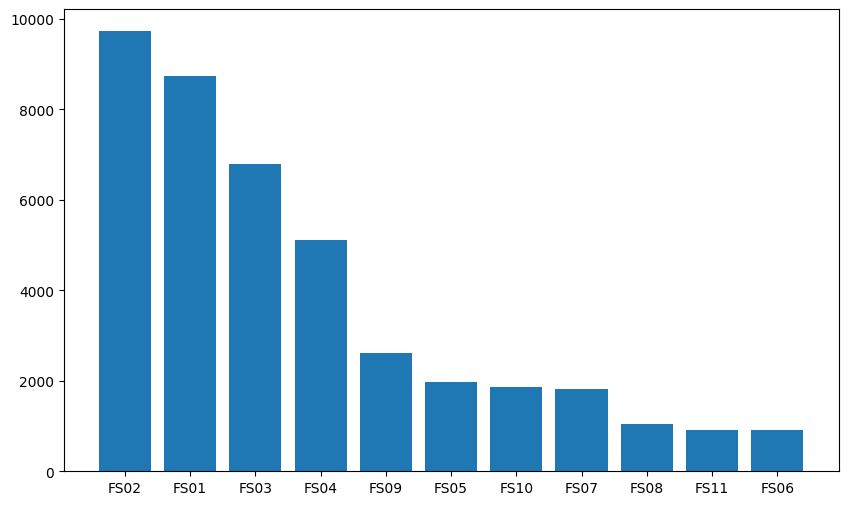

In [8]:
total_FS = data_pt[col_names].sum()

prop_FS = total_FS
prop_FS = prop_FS.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(prop_FS.index, prop_FS)

plt.show()

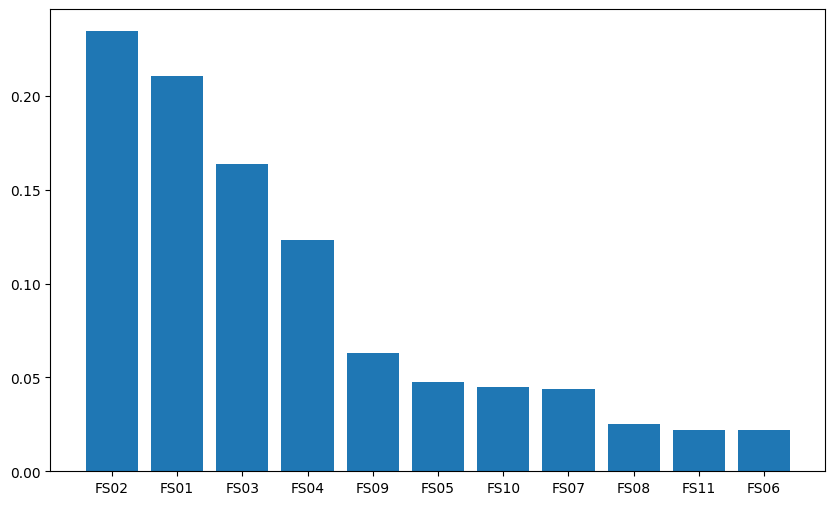

In [9]:
total_skill = data_pt[col_names].sum()

prop_FS = total_FS / total_FS.sum()
prop_FS = prop_FS.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(prop_FS.index, prop_FS)

plt.show()

In [10]:
data_pt

code.2,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
code,,,,,,,,,,,
C1,2435,2681,1755,1525,496,395,687,261,910,611,301
C2,1088,1174,835,504,222,193,343,142,442,286,134
C3,1547,1325,583,1033,468,66,144,200,340,252,183
C4,983,1945,1825,826,261,71,158,89,311,216,111
C5,2078,1883,1305,790,350,129,344,203,453,354,145
C6,600,718,480,431,171,53,136,145,157,135,48


In [11]:
my_ca = CA(row_labels=data_pt.index.values, col_labels=data_pt.columns.values,stats=True)

In [12]:
my_ca.fit(data_pt.values)


CA(col_labels=array(['FS01', 'FS02', 'FS03', 'FS04', 'FS05', 'FS06', 'FS07', 'FS08',
       'FS09', 'FS10', 'FS11'], dtype=object),
   row_labels=array(['C1', 'C2', 'C3', 'C4', 'C5', 'C6'], dtype=object))

In [13]:
my_ca.eig_

array([[2.81565386e-02, 1.59919614e-02, 4.75539116e-03, 1.94720468e-03,
        3.67286800e-04],
       [5.49735019e+01, 3.12230894e+01, 9.28453988e+00, 3.80176917e+00,
        7.17099567e-01],
       [5.49735019e+01, 8.61965914e+01, 9.54811313e+01, 9.92829004e+01,
        1.00000000e+02]])

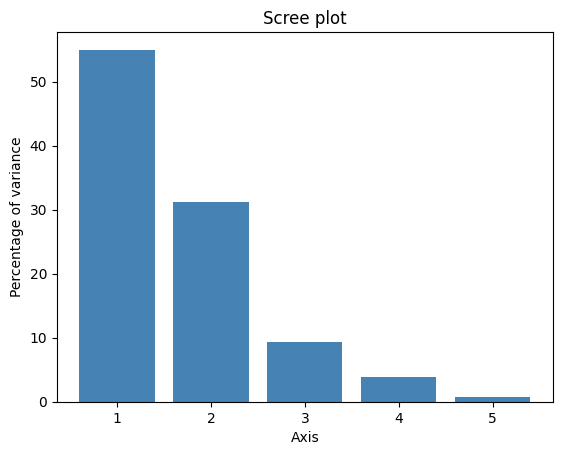

In [14]:
# Graphique des valeurs propres
my_ca.plot_eigenvalues(type="percentage")

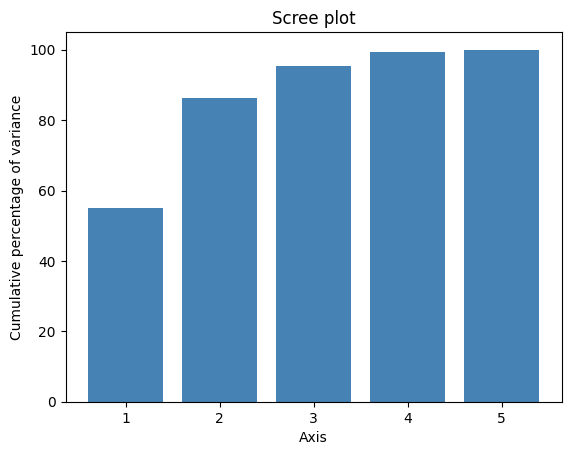

In [15]:
my_ca.plot_eigenvalues(type="cumulative")


Premier axe factoriel


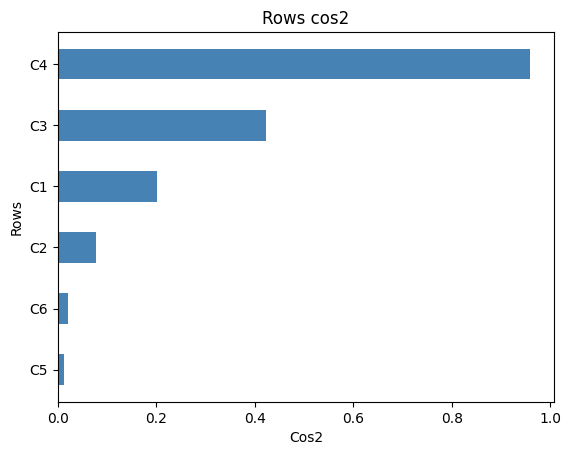

Second axe factoriel


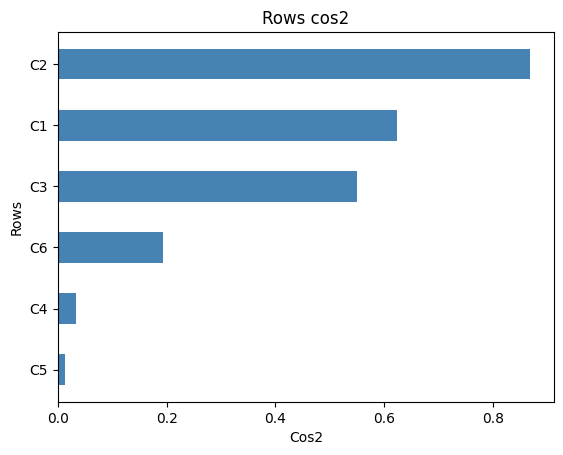

In [16]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
print("Premier axe factoriel")
my_ca.plot_row_cos2(num_axis=1)
print("Second axe factoriel")
my_ca.plot_row_cos2(num_axis=2)

Premier axe factoriel


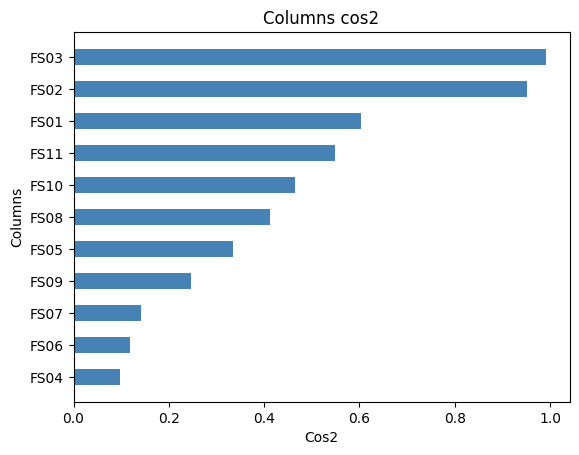

Second axe factoriel


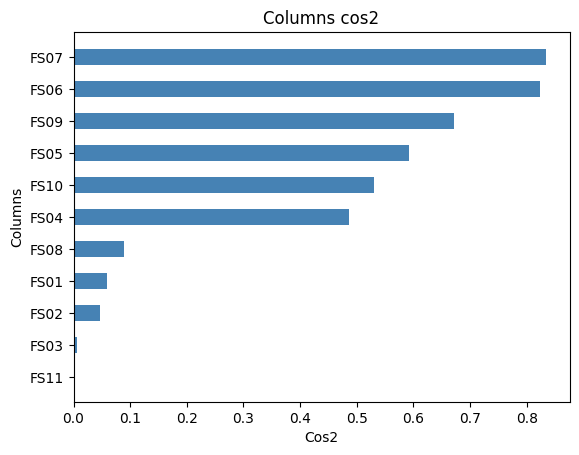

In [17]:
#### Profil colonne (les Candidats)

print("Premier axe factoriel")
my_ca.plot_col_cos2(num_axis=1)
print("Second axe factoriel")
my_ca.plot_col_cos2(num_axis=2)

Premier axe


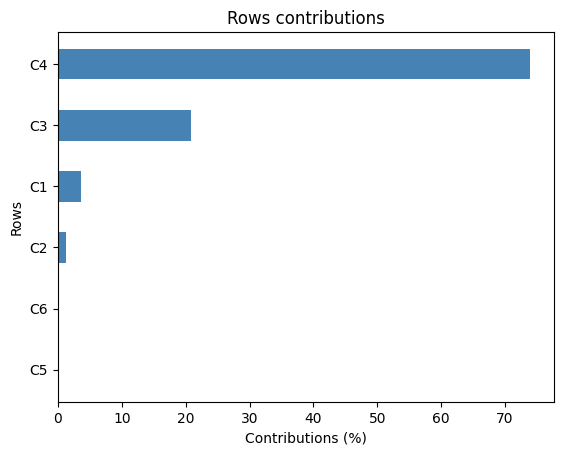

Second axe


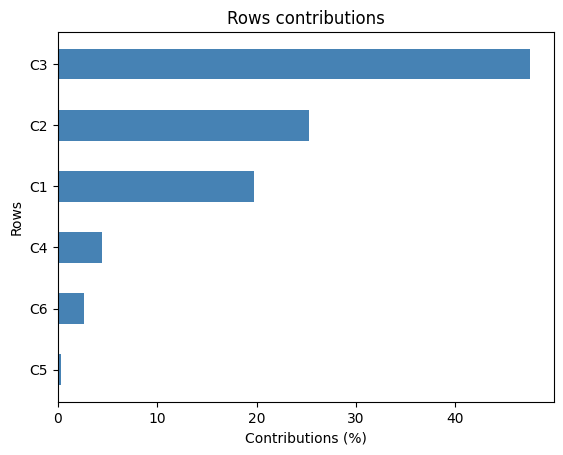

In [18]:
# Analyse  du premier plan factoriel - les départements
print("Premier axe")
my_ca.plot_row_contrib(num_axis=1)
print("Second axe")
my_ca.plot_row_contrib(num_axis=2)

Premier axe


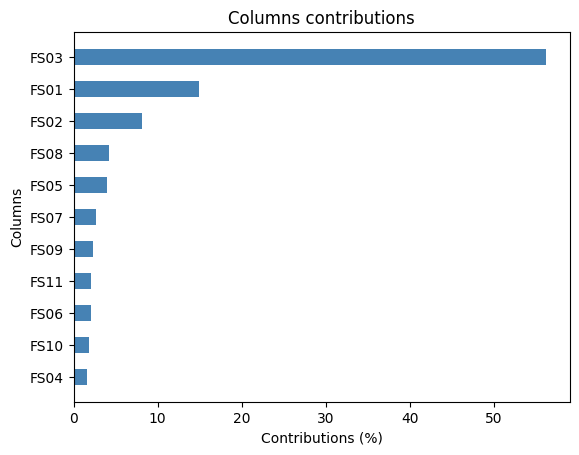

Second axe


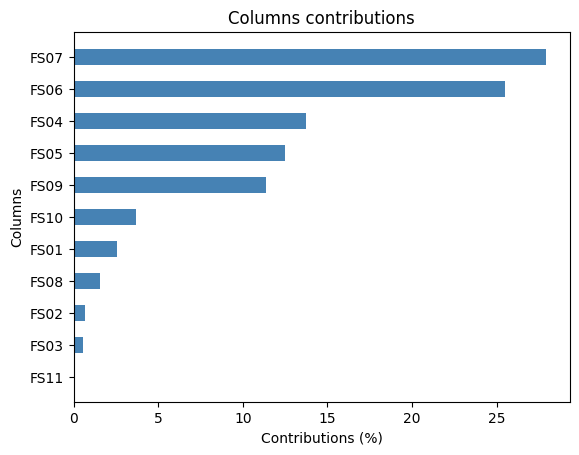

In [19]:
# Analyse  du premier plan factoriel - les départements
print("Premier axe")
my_ca.plot_col_contrib(num_axis=1)
print("Second axe")
my_ca.plot_col_contrib(num_axis=2)

In [20]:
info_skill=my_ca.row_topandas()
info_skill

,row_coord_dim1,row_coord_dim2,row_coord_dim3,row_coord_dim4,row_coord_dim5,row_contrib_dim1,row_contrib_dim2,row_contrib_dim3,row_contrib_dim4,row_contrib_dim5,row_cos2_dim1,row_cos2_dim2,row_cos2_dim3,row_cos2_dim4,row_cos2_dim5
C1,-0.059358,0.104153,-0.047854,0.020300,-0.018605,3.638651,19.724165,14.002825,6.153739,27.403084,0.202268,0.622740,0.131465,0.023657,0.019871
C2,-0.052852,0.176725,0.002323,-0.016328,0.040841,1.283131,25.259121,0.014674,1.770758,58.738516,0.077669,0.868390,0.000150,0.007413,0.046379
C3,-0.198796,-0.226629,-0.039779,0.027370,0.012412,20.786979,47.564940,4.928203,5.697480,6.212316,0.423277,0.550101,0.016948,0.008023,0.001650
C4,0.356447,-0.066023,-0.027910,0.013383,0.004717,73.957410,4.467490,2.684840,1.507560,0.992974,0.959670,0.032925,0.005884,0.001353,0.000168
C5,-0.015561,-0.016175,0.137126,0.005228,-0.007856,0.166620,0.316976,76.613056,0.272007,3.255964,0.012484,0.013488,0.969437,0.001409,0.003182
C6,-0.025200,-0.075854,-0.033566,-0.149065,-0.012973,0.167209,2.667307,1.756402,84.598455,3.397146,0.021237,0.192407,0.037675,0.743053,0.005628


In [21]:
info_FS=my_ca.col_topandas()
info_FS

,col_coord_dim1,col_coord_dim2,col_coord_dim3,col_coord_dim4,col_coord_dim5,col_contrib_dim1,col_contrib_dim2,col_contrib_dim3,col_contrib_dim4,col_contrib_dim5,col_cos2_dim1,col_cos2_dim2,col_cos2_dim3,col_cos2_dim4,col_cos2_dim5
FS01,-0.141050,-0.044136,0.102702,0.022291,-0.006799,14.878075,2.564823,46.703788,5.373148,2.649773,0.604092,0.059147,0.320269,0.015088,0.001403
FS02,0.098836,-0.021879,0.002301,0.000855,-0.002245,8.137799,0.702124,0.026126,0.008811,0.321794,0.952257,0.046664,0.000516,0.000071,0.000491
FS03,0.310943,0.023571,0.014249,-0.007866,0.006284,56.172294,0.568309,0.698397,0.519831,1.758985,0.991184,0.005696,0.002081,0.000634,0.000405
FS04,-0.059775,-0.133438,-0.119470,0.008601,-0.029289,1.563536,13.718640,36.981536,0.468117,28.778519,0.097667,0.486712,0.390149,0.002022,0.023449
FS05,-0.154239,-0.205061,-0.050601,-0.010526,0.050664,4.010066,12.479803,2.555526,0.270074,33.169358,0.334698,0.591606,0.036024,0.001559,0.036113
FS06,-0.162968,0.431533,-0.114332,0.009942,-0.000770,2.063242,25.471392,6.012784,0.111027,0.003532,0.117541,0.824166,0.057853,0.000437,0.000003
FS07,-0.131542,0.319550,0.003113,-0.050936,-0.020361,2.685489,27.903121,0.008907,5.822587,4.932729,0.141326,0.834017,0.000079,0.021191,0.003386
FS08,-0.216867,-0.100407,0.005152,-0.237693,0.018563,4.189479,1.581179,0.013997,72.773423,2.353101,0.412621,0.088449,0.000233,0.495674,0.003023
FS09,-0.102900,0.169678,-0.043719,0.031996,0.024225,2.369806,11.345064,2.532889,3.313165,10.068890,0.246812,0.671093,0.044553,0.023863,0.013679
FS10,-0.107355,0.114491,-0.004823,-0.009185,-0.002042,1.830179,3.664940,0.021871,0.193703,0.050754,0.465755,0.529728,0.000940,0.003409,0.000168


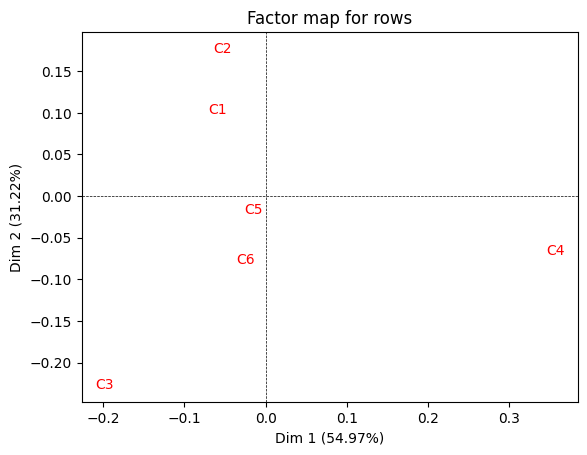

In [22]:
# Graphique des compétences (en ligne)
my_ca.mapping_row(num_x_axis=1,num_y_axis=2)

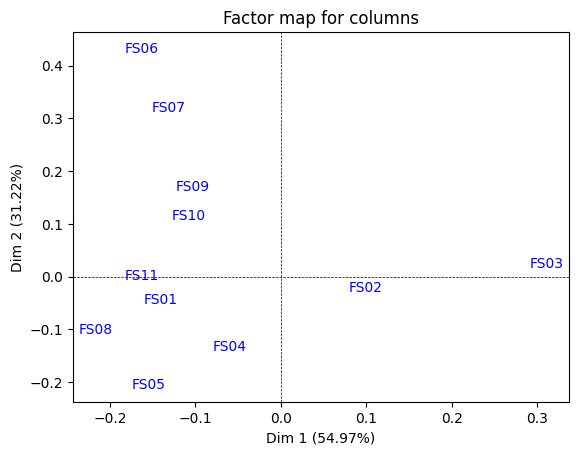

In [23]:
# Graphique des familles de situation (en colonne)
my_ca.mapping_col(num_x_axis=1,num_y_axis=2)

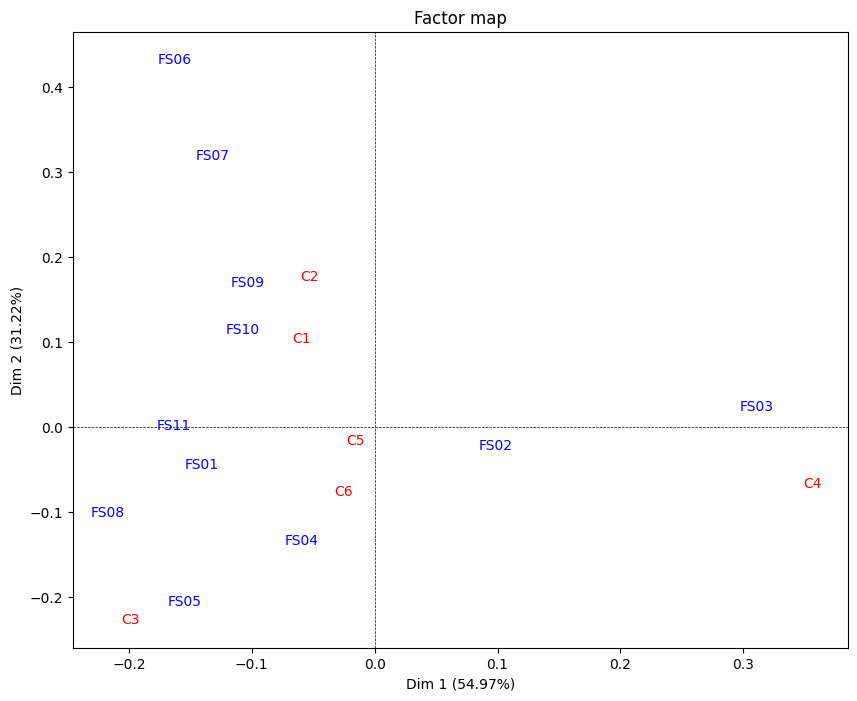

In [24]:
# Graphique profil ligne profil colonne

my_ca.mapping(1, 2, figsize=(10, 8))